In [ ]:
import tensorflow as tf

In [ ]:
# sample data generation
tf.random.set_seed(42)
x_data = tf.range(-40, 400, 4)
y_data = x_data + 10
x_data, y_data

(<tf.Tensor: shape=(110,), dtype=int32, numpy=
 array([-40, -36, -32, -28, -24, -20, -16, -12,  -8,  -4,   0,   4,   8,
         12,  16,  20,  24,  28,  32,  36,  40,  44,  48,  52,  56,  60,
         64,  68,  72,  76,  80,  84,  88,  92,  96, 100, 104, 108, 112,
        116, 120, 124, 128, 132, 136, 140, 144, 148, 152, 156, 160, 164,
        168, 172, 176, 180, 184, 188, 192, 196, 200, 204, 208, 212, 216,
        220, 224, 228, 232, 236, 240, 244, 248, 252, 256, 260, 264, 268,
        272, 276, 280, 284, 288, 292, 296, 300, 304, 308, 312, 316, 320,
        324, 328, 332, 336, 340, 344, 348, 352, 356, 360, 364, 368, 372,
        376, 380, 384, 388, 392, 396], dtype=int32)>,
 <tf.Tensor: shape=(110,), dtype=int32, numpy=
 array([-30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,  14,  18,
         22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,  66,  70,
         74,  78,  82,  86,  90,  94,  98, 102, 106, 110, 114, 118, 122,
        126, 130, 134, 138, 142, 146, 150, 154, 1

In [ ]:
# splitting the data for tranning and testnig on x_data
x_train = x_data[:80]
x_test = x_data[80:]
x_train, x_test

(<tf.Tensor: shape=(80,), dtype=int32, numpy=
 array([-40, -36, -32, -28, -24, -20, -16, -12,  -8,  -4,   0,   4,   8,
         12,  16,  20,  24,  28,  32,  36,  40,  44,  48,  52,  56,  60,
         64,  68,  72,  76,  80,  84,  88,  92,  96, 100, 104, 108, 112,
        116, 120, 124, 128, 132, 136, 140, 144, 148, 152, 156, 160, 164,
        168, 172, 176, 180, 184, 188, 192, 196, 200, 204, 208, 212, 216,
        220, 224, 228, 232, 236, 240, 244, 248, 252, 256, 260, 264, 268,
        272, 276], dtype=int32)>, <tf.Tensor: shape=(30,), dtype=int32, numpy=
 array([280, 284, 288, 292, 296, 300, 304, 308, 312, 316, 320, 324, 328,
        332, 336, 340, 344, 348, 352, 356, 360, 364, 368, 372, 376, 380,
        384, 388, 392, 396], dtype=int32)>)

In [ ]:
# splitting the data for tranning and testnig on ys2
y_train = y_data[:80]
y_test = y_data[80:]
y_train, y_test

(<tf.Tensor: shape=(80,), dtype=int32, numpy=
 array([-30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,  14,  18,
         22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,  66,  70,
         74,  78,  82,  86,  90,  94,  98, 102, 106, 110, 114, 118, 122,
        126, 130, 134, 138, 142, 146, 150, 154, 158, 162, 166, 170, 174,
        178, 182, 186, 190, 194, 198, 202, 206, 210, 214, 218, 222, 226,
        230, 234, 238, 242, 246, 250, 254, 258, 262, 266, 270, 274, 278,
        282, 286], dtype=int32)>, <tf.Tensor: shape=(30,), dtype=int32, numpy=
 array([290, 294, 298, 302, 306, 310, 314, 318, 322, 326, 330, 334, 338,
        342, 346, 350, 354, 358, 362, 366, 370, 374, 378, 382, 386, 390,
        394, 398, 402, 406], dtype=int32)>)

In [ ]:
# plot the graph function
import matplotlib.pyplot as plt

def plot_prediction(x_train = x_train, y_train=y_train, x_test=x_test, y_test=y_test, x_pred=None, y_pred=None):
  # to visulize the data between train,test and predict
  plt.figure(figsize=(15,10))
  # plot tranning data
  plt.scatter(x_train, y_train, label='Trained Data', c='b') 
  # plot test data
  plt.scatter(x_test, y_test, label='Tested Data', c='g')
  # plot predicted data
  plt.scatter(x_pred, y_pred, label='predicted Data', c='r') 
  # show the data
  plt.legend();

In [ ]:
# mae, mse
def get_mae(y_true=y_test, y_preds=None):
  return tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_preds)

def get_mse(y_true=y_test, y_preds=None):
  return tf.metrics.mean_squared_error(y_true=y_test, y_pred=y_preds)

In [ ]:
# create a model_1
model_1 = tf.keras.Sequential([
      tf.keras.layers.Dense(1, input_shape=[1], name='layer1')
])

# compile a model
model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = tf.keras.metrics.mae
)

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.fit(x_train,y_train, epochs=100)

In [ ]:
y_preds = tf.squeeze(model_1.predict(x_test))
y_preds

<tf.Tensor: shape=(30,), dtype=float32, numpy=
array([406.1237 , 411.9189 , 417.71414, 423.5094 , 429.30463, 435.09988,
       440.8951 , 446.69034, 452.4856 , 458.28082, 464.07608, 469.8713 ,
       475.66656, 481.4618 , 487.25702, 493.05228, 498.8475 , 504.64276,
       510.438  , 516.2332 , 522.02844, 527.82367, 533.6189 , 539.4142 ,
       545.2094 , 551.00464, 556.79987, 562.5951 , 568.3904 , 574.1856 ],
      dtype=float32)>

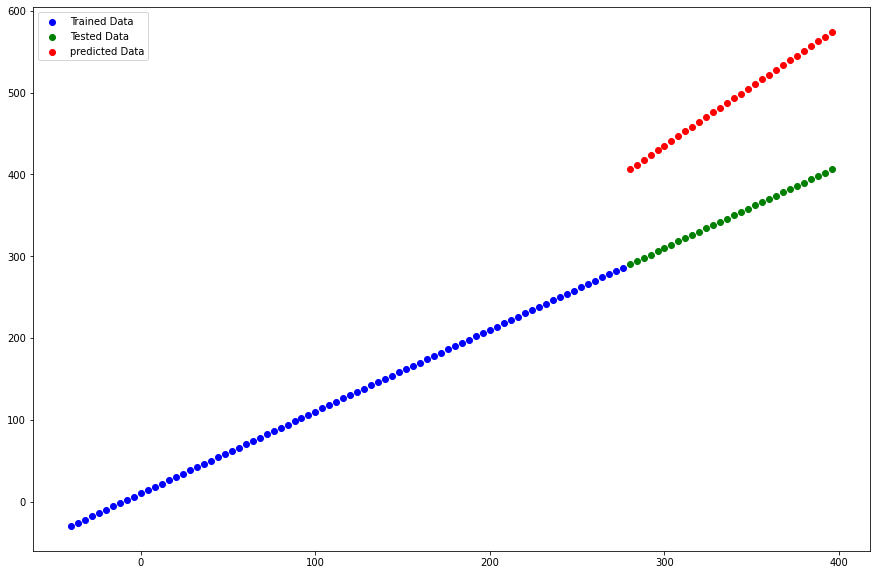

In [ ]:
plot_prediction(x_pred=x_test, y_pred=y_preds)

In [ ]:
model_1_mae = get_mae(y_preds=y_preds)
model_1_mse = get_mse(y_preds=y_preds)
model_1_mae,model_1_mse

(<tf.Tensor: shape=(), dtype=float32, numpy=142.15463>,
 <tf.Tensor: shape=(), dtype=float32, numpy=20449.389>)

In [ ]:
# create model2 with 2 dense layers
model_2 = tf.keras.Sequential([
      tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
      tf.keras.layers.Dense(1, name='final_layer')
])
# compile the model
model_2.compile(
    loss= tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics = ['mae']
)
# fitting a model_2
model_2.fit(x_train, y_train, epochs=100)

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
final_layer (Dense)          (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# predict the model
model_2_predict = tf.squeeze(model_2.predict(x_test))
model_2_predict

<tf.Tensor: shape=(30,), dtype=float32, numpy=
array([ 8.142626 ,  8.243988 ,  8.345349 ,  8.446711 ,  8.548073 ,
        8.649435 ,  8.750797 ,  8.852159 ,  8.95352  ,  9.054882 ,
        9.156244 ,  9.257606 ,  9.358967 ,  9.46033  ,  9.561692 ,
        9.6630535,  9.764416 ,  9.865777 ,  9.967139 , 10.0685005,
       10.169863 , 10.271225 , 10.372585 , 10.473948 , 10.575311 ,
       10.676672 , 10.778033 , 10.8793955, 10.980758 , 11.082118 ],
      dtype=float32)>

In [ ]:
x_train,model_2_predict

(<tf.Tensor: shape=(80,), dtype=int32, numpy=
 array([-40, -36, -32, -28, -24, -20, -16, -12,  -8,  -4,   0,   4,   8,
         12,  16,  20,  24,  28,  32,  36,  40,  44,  48,  52,  56,  60,
         64,  68,  72,  76,  80,  84,  88,  92,  96, 100, 104, 108, 112,
        116, 120, 124, 128, 132, 136, 140, 144, 148, 152, 156, 160, 164,
        168, 172, 176, 180, 184, 188, 192, 196, 200, 204, 208, 212, 216,
        220, 224, 228, 232, 236, 240, 244, 248, 252, 256, 260, 264, 268,
        272, 276], dtype=int32)>,
 <tf.Tensor: shape=(30,), dtype=float32, numpy=
 array([ 8.142626 ,  8.243988 ,  8.345349 ,  8.446711 ,  8.548073 ,
         8.649435 ,  8.750797 ,  8.852159 ,  8.95352  ,  9.054882 ,
         9.156244 ,  9.257606 ,  9.358967 ,  9.46033  ,  9.561692 ,
         9.6630535,  9.764416 ,  9.865777 ,  9.967139 , 10.0685005,
        10.169863 , 10.271225 , 10.372585 , 10.473948 , 10.575311 ,
        10.676672 , 10.778033 , 10.8793955, 10.980758 , 11.082118 ],
       dtype=float32)>)

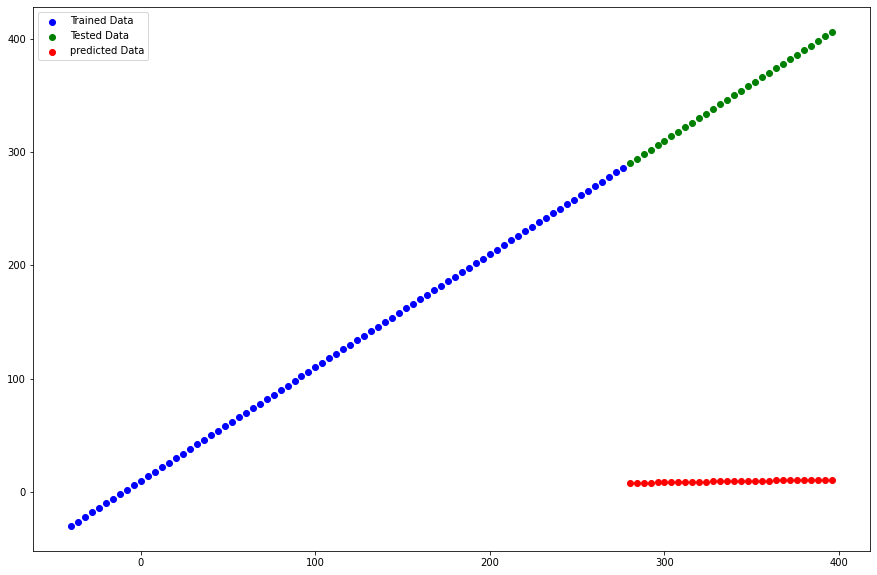

In [ ]:
plot_prediction(x_pred=x_test, y_pred=model_2_predict)

In [ ]:
get_mae(y_preds=model_2_predict), get_mse(y_preds=model_2_predict)

(<tf.Tensor: shape=(), dtype=float32, numpy=338.38763>,
 <tf.Tensor: shape=(), dtype=float32, numpy=115644.875>)

In [ ]:
# create model_3 with single dense layer with 100 nodes and optimizer as Adam
model_3 = tf.keras.Sequential([
        tf.keras.layers.Dense(100, input_shape=[1],activation='relu', name='layer_1'),
        tf.keras.layers.Dense(1)
])

# compile the model
model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ['mae']
)

#Fitting a model_3
model_3.fit(x_train, y_train, epochs=100)

In [ ]:
model_3_pred_y = tf.constant(model_3.predict(x_test))
model_3_pred_y

In [ ]:
x_test, tf.squeeze(model_3_pred_y)

(<tf.Tensor: shape=(30,), dtype=int32, numpy=
 array([280, 284, 288, 292, 296, 300, 304, 308, 312, 316, 320, 324, 328,
        332, 336, 340, 344, 348, 352, 356, 360, 364, 368, 372, 376, 380,
        384, 388, 392, 396], dtype=int32)>,
 <tf.Tensor: shape=(30,), dtype=float32, numpy=
 array([288.99466, 292.99905, 297.00348, 301.0079 , 305.01233, 309.01675,
        313.02115, 317.0256 , 321.03003, 325.03442, 329.03885, 333.04327,
        337.0477 , 341.05212, 345.05655, 349.061  , 353.06543, 357.06982,
        361.07425, 365.07867, 369.08307, 373.0875 , 377.09195, 381.09634,
        385.10074, 389.10516, 393.10962, 397.11404, 401.1184 , 405.1229 ],
       dtype=float32)>)

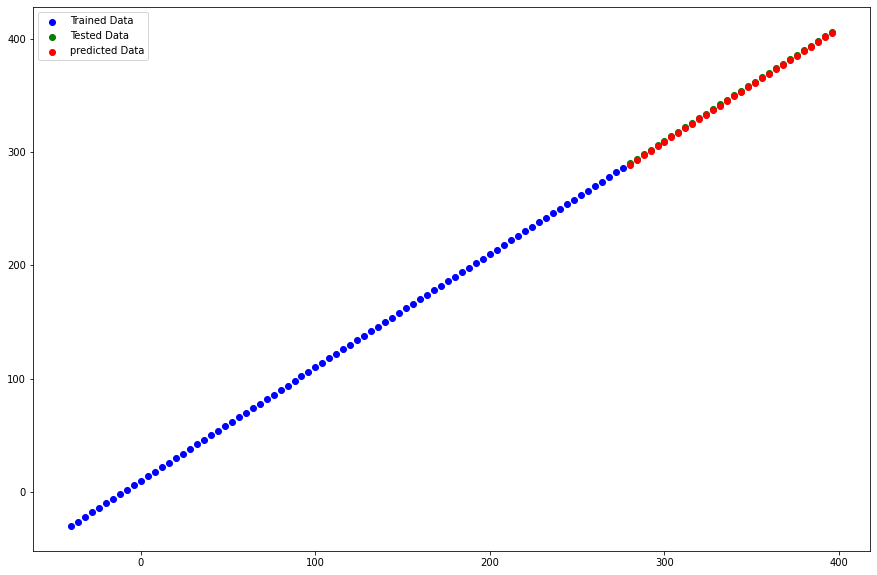

In [ ]:
plot_prediction(x_pred=x_test, y_pred=model_3_pred_y)

In [ ]:
#Saving the moddel_3
model_3.save('model_3_export')
# saving the model_3 in hdf5 formate
model_3.save("model_3_export_H5form.h5")

INFO:tensorflow:Assets written to: model_3_export/assets
